In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time

In [5]:
raw = pd.read_csv("data_sets/Books_Raw.csv")
clean = pd.read_csv("data_sets/CleanDataSet.csv")
GB10k = pd.read_csv("data_sets/GoodBooks-10k.csv")

In [6]:
start_time = time.time()
reviews = pd.read_csv("data_sets/Reviews_Raw.csv")
end_time = time.time()
print("Import time:", end_time - start_time, "seconds")

Import time: 18.082515239715576 seconds


## Basic Stuff

In [4]:
Reviews["review/text"].head()

0    This is only for Julie Strain fans. It's a col...
1    I don't care much for Dr. Seuss but after read...
2    If people become the books they read and if "t...
3    Theodore Seuss Geisel (1904-1991), aka &quot;D...
4    Philip Nel - Dr. Seuss: American IconThis is b...
Name: review/text, dtype: object

In [5]:
print(clean.count())
print(len(clean))

title             211704
description       211704
authors           211704
imageLink         159693
previewLink       187644
publishingDate    186075
categories        211704
isbn              162032
states            211704
dtype: int64
211704


In [6]:
print(raw.count())
print(len(raw))

Title            212403
description      143962
authors          180991
image            160329
previewLink      188568
publisher        136518
publishedDate    187099
infoLink         188568
categories       171205
ratingsCount      49752
dtype: int64
212404


In [7]:
# A book without a title
raw[raw["Title"].isnull()]

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
1066,NaN,NaN,['Maharshi Ramana'],http://books.google.com/books/content?id=uq0uj...,http://books.google.nl/books?id=uq0ujwEACAAJ&d...,NaN,2015-12-15,http://books.google.nl/books?id=uq0ujwEACAAJ&d...,NaN,1.0


In [8]:
print(GB10k.count())
print(len(GB10k))

id                           10000
book_id                      10000
best_book_id                 10000
work_id                      10000
books_count                  10000
isbn                          9300
isbn13                        9415
authors                      10000
original_publication_year     9979
original_title                9415
title                        10000
language_code                 8916
average_rating               10000
ratings_count                10000
work_ratings_count           10000
work_text_reviews_count      10000
ratings_1                    10000
ratings_2                    10000
ratings_3                    10000
ratings_4                    10000
ratings_5                    10000
image_url                    10000
small_image_url              10000
dtype: int64
10000


## Explore the categories present in both tables

In [4]:
print(raw["categories"].value_counts())
print(clean["categories"].value_counts())

categories
['Fiction']                               23419
['Religion']                               9459
['History']                                9330
['Juvenile Fiction']                       6643
['Biography & Autobiography']              6324
                                          ...  
['Authors, Japanese']                         1
['Birth certificates']                        1
['Restaurant management']                     1
['Oxford (England)']                          1
['Flame in the wind (Motion picture)']        1
Name: count, Length: 10883, dtype: int64
categories
Uncategorized             41263
Fiction                   23288
Religion                   9366
History                    9333
Juvenile Fiction           6616
                          ...  
Maya calendar                 1
Gay couples                   1
Astronomy in the Bible        1
Infill housing                1
Track and field               1
Name: count, Length: 10526, dtype: int64


In [102]:
"other" in raw["categories"]

False

In [70]:
print(any(cat == "['Authors, Japanese']" for cat in raw["categories"]))
print(any(cat == "Authors, Japanese" for cat in clean["categories"]))

True
True


In [81]:
tally_clean = clean["categories"].value_counts()
tally_clean[tally_clean==1].count()/tally_clean.count() # Just over half of the categories have only 1 entry

0.5682120463613909

In [84]:
tally_raw = raw["categories"].value_counts()
tally_raw[tally_raw==1].count()/tally_raw.count() # Just over half of the categories have only 1 entry

0.6004778094275476

In [97]:
tally = clean["categories"].value_counts()
tally[tally>20] 
tally.head(10)

categories
Uncategorized                41263
Fiction                      23288
Religion                      9366
History                       9333
Juvenile Fiction              6616
Biography & Autobiography     6289
Business & Economics          5597
Computers                     4291
Social Science                3813
Juvenile Nonfiction           3407
Name: count, dtype: int64

In [26]:
ss=clean["categories"].iloc[3]
print(ss)
print(ss == "Fiction")
print("Fiction" in clean["categories"]) # Dit is 
print(any(cat == "Fiction" for cat in clean["categories"])) # Totally unclear why this would be different from the above

clean[clean["categories"]=="Fiction"]
df.head()

Fiction
True
False
True


,title,description,authors,imageLink,previewLink,publishingDate,categories,isbn,states
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,2005-02-23 00:00:00,Fiction,9.780595e+12,NIEUW
24,The Forbidden Stories of Marta Veneranda,"Marta Veneranda, a Latina neoyorkina, finds th...",['Sonia Rivera-Valdes'],http://books.google.com/books/content?id=A7aYb...,http://books.google.nl/books?id=A7aYbAvagu8C&p...,2001-03-06 00:00:00,Fiction,9.781583e+12,NIEUW
49,"Eight Men And A Lady (Elizabeth Sinclair, Harl...",Eight Men And A Lady by Elizabeth Sinclair rel...,['Elizabeth Sinclair'],http://books.google.com/books/content?id=Z6uzJ...,http://books.google.nl/books?id=Z6uzJgLWViUC&q...,1997-04-23 00:00:00,Fiction,9.780373e+12,NIEUW
52,Anna Karenina. (Lernmaterialien),"De 16-jarige vrienden Red (ik-figuur), Leo, Ro...",['Cara Delevingne'],NaN,http://books.google.nl/books?id=o0kqtAEACAAJ&d...,2017-11-10 00:00:00,Fiction,9.789403e+12,NIEUW
53,Seance,"Mysterieus, duister en passioneel Londen, 19de...",['Kevin Valgaeren'],http://books.google.com/books/content?id=BiOTC...,http://books.google.nl/books?id=BiOTCwAAQBAJ&p...,2016-02-13 00:00:00,Fiction,9.789401e+12,NIEUW


In [30]:
"Fiction" in clean["categories"][:4]

False

In [120]:
print(any(cat == "missing" for cat in clean["categories"]))

False


In [29]:
# Example data. NB: this does not work for string!!
data = pd.Series([1, 2, 3, 4])

# Check if value is present
value = 2

value in data

True

## Unique Titles?

In [16]:
clean["title"].value_counts() 

title
Wallace Stevens : Collected Poetry and Prose (Library of America)                                                                         2
Break a Leg!: The Kid's Guide to Acting and Stagecraft                                                                                    2
Indra's Pearls: The Vision of Felix Klein                                                                                                 2
Golden fleece;: The story of Franz Joseph & Elisabeth of Austria,                                                                         2
Peterson's the Minority Career Guide: What African Americans, Hispanics, and Asian Americans Must Know to Succeed in Corporate America    2
                                                                                                                                         ..
New Essays on Call It Sleep (The American Novel)                                                                                          1
Treatment Guid

In [37]:
raw["Title"].value_counts()

Title
Its Only Art If Its Well Hung!                                                                1
CAUGHT IN THE NET                                                                             1
Halo 2: The Official Game Guide                                                               1
The Black Prince                                                                              1
Happy Birthday, Biscuit!                                                                      1
                                                                                             ..
When Dinosaurs Go to School                                                                   1
Busted! (Sweet Valley University(R))                                                          1
Seismic Isolation for Earthquake Resistant Structures (Advances in Earthquake Engineering)    1
Mel Bay Presents Complete Book of Wedding Music for Flute or Violin                           1
Student's Solutions Manual for Joh

## ISBNs in Clean

In [32]:
# These are floats
clean["isbn"]

0         9.781883e+12
1         9.780826e+12
2         9.780830e+12
3         9.780595e+12
4         9.789766e+12
              ...     
211699    9.781561e+12
211700    9.780425e+12
211701    9.781566e+12
211702    9.780672e+12
211703    9.780575e+12
Name: isbn, Length: 211704, dtype: float64

In [81]:
# Make them into integers
clean["isbn_int"] = clean["isbn"].astype('Int64')

In [34]:
clean["isbn_length"]  = clean["isbn_int"].astype(str).apply(len)

In [85]:
clean[type(clean["isbn_int"]) == type(clean["isbn_int"].iloc[1])]

KeyError: False

In [79]:
def my_len(my_int):
    if pd.isna(my_int):
        return my_int
    else:
        return my_int.astype(str).apply(len)

clean["isbn_my_length"]  = clean["isbn_int"].apply(my_len)

AttributeError: 'float' object has no attribute 'astype'

In [46]:
clean[clean["isbn_length"]==4]

,title,description,authors,imageLink,previewLink,publishingDate,categories,isbn,states,isbn_int,isbn_length
6,The Overbury affair (Avon),Geen beschrijving,['Miriam Allen De Ford'],NaN,http://books.google.nl/books?id=mHLTngEACAAJ&d...,1960-04-23 00:00:00,Uncategorized,NaN,NIEUW,<NA>,4
7,A Walk in the Woods: a Play in Two Acts,Geen beschrijving,['Lee Blessing'],NaN,http://books.google.nl/books?id=6HDOwAEACAAJ&d...,1988-04-23 00:00:00,Uncategorized,NaN,NIEUW,<NA>,4
15,Gold and greenstone,Sally did most things better than men but it w...,['Barry Crump'],NaN,http://books.google.nl/books?id=I5NOAQAACAAJ&d...,2009-04-23 00:00:00,New Zealand fiction,NaN,NIEUW,<NA>,4
27,"Thomas Jefferson, (American statesmen)",Geen beschrijving,['John T. Morse'],NaN,http://books.google.nl/books?id=5YNDzwEACAAJ&d...,1888-04-23 00:00:00,Uncategorized,NaN,NIEUW,<NA>,4
34,Treat yourself to life,Geen beschrijving,['Raymond Charles Barker'],http://books.google.com/books/content?id=Q6Tkg...,http://books.google.nl/books?id=Q6Tkg70-rlEC&q...,1954-04-23 00:00:00,New Thought,NaN,NIEUW,<NA>,4
...,...,...,...,...,...,...,...,...,...,...,...
211656,"Is it hard?, Is it easy?",Aims to develop children's awareness of each i...,['Mary McBurney Green'],NaN,http://books.google.com/books?id=pif7LQEACAAJ&...,1967-04-23 00:00:00,Child development,NaN,NIEUW,<NA>,4
211663,Picture-Perfect Science Lessons: Using Childre...,Geen beschrijving,['No Author'],http://books.google.com/books/content?id=BtEPA...,http://books.google.com/books?id=BtEPAQAAMAAJ&...,2005-04-23 00:00:00,Children's libraries,NaN,NIEUW,<NA>,4
211665,Track and field omnibook,Geen beschrijving,['Ken Doherty'],http://books.google.com/books/content?id=bnRYA...,http://books.google.com/books?id=bnRYAAAAYAAJ&...,1971-04-23 00:00:00,Track and field,NaN,NIEUW,<NA>,4
211689,Speed Japanese: 4 One Hour Multi-Track CDs,Geen beschrijving,['No Author'],http://books.google.com/books/content?id=olpbA...,http://books.google.com/books?id=olpbAAAAMAAJ&...,2006-04-23 00:00:00,Popular music,NaN,NIEUW,<NA>,4


In [77]:
# Pandas has its own way of implementing missing values?
isbn_nan = clean["isbn"].iloc[6]
print(isbn_nan)
print(pd.isna(isbn_nan))
print(isbn_nan == None)
print(isbn_nan == np.nan)
print(isbn_nan is None)

nan
True
False
False
False


## Histogram for Ratingcount

In [12]:
rats = raw["ratingsCount"]

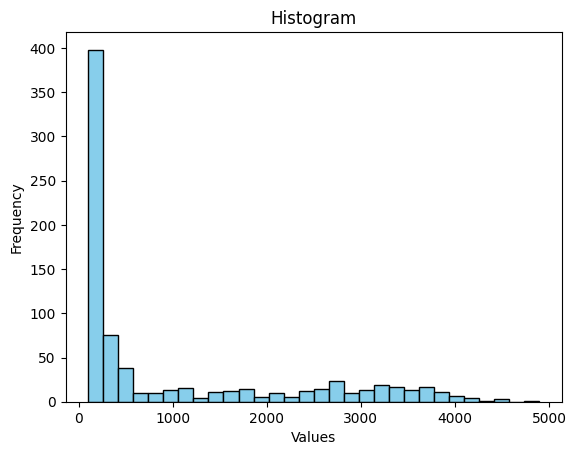

In [16]:
# Plot histogram. NB almost all ratingcount values are under 100. 
plt.hist(rats[rats>100], bins=30, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram')

# Show plot
plt.show()

## Titles in review data

In [18]:
book_titles = reviews["Title"].value_counts()

In [22]:
reviews.head(1)

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...


In [20]:
## Took 22 mins to run this cell

start_time = time.time()
vals = []
for title in book_titles.index:
    present = any(Title == title for Title in raw["Title"])
    vals.append(present)
end_time = time.time()
print("Import time:", end_time - start_time, "seconds")

Import time: 1337.3234386444092 seconds


In [21]:
any(vals)

True

In [23]:
# ALL TITLES IN THE REVIEWS DATABASE ARE IN THE BOOK DATA BASE